In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('BigMartSalesData.csv')

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB


### 1. Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

In [25]:
# #Get sales for the year 2011
df_month = df[df['Year'] == 2011]
df_month.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
42479,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,19.5,04-01-11,4,1,2011,13313.0,United Kingdom
42480,539993,21499,BLUE POLKADOT WRAP,25,0.42,10.5,04-01-11,4,1,2011,13313.0,United Kingdom
42481,539993,21498,RED RETROSPOT WRAP,25,0.42,10.5,04-01-11,4,1,2011,13313.0,United Kingdom
42482,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,10.5,04-01-11,4,1,2011,13313.0,United Kingdom
42483,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,12.5,04-01-11,4,1,2011,13313.0,United Kingdom


In [28]:
# #Getting sales data every month for the year 2011
df_total = df_month.groupby('Month').agg({'Amount':np.sum})
df_total

,Amount
Month,
1,822669.640
2,549134.460
3,752003.310
4,582318.451
5,817655.200
6,832231.670
7,757108.941
8,791173.020
9,1097467.722


In [33]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


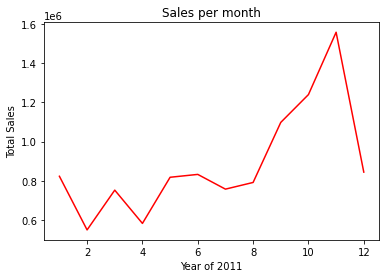

In [36]:
# Plotting the sales data for the year 2011

plt.plot(df_total['Amount'],color = 'red', linestyle='solid')
plt.xlabel('Year of 2011')
plt.ylabel('Total Sales')
plt.title('Sales per month')
plt.show()

Total sales has increased from month 8 i.e.August to November, and sales is maximum in the month of November. February month has lowest sales in 2011.

### 2. Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

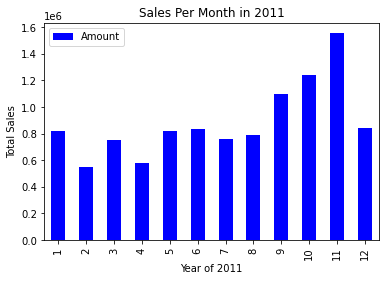

In [39]:
df_month.groupby('Month').agg({'Amount':np.sum}).plot(kind='bar', color='blue')
plt.xlabel('Year of 2011')
plt.ylabel('Total Sales')
plt.title('Sales Per Month in 2011')
plt.show()

Yes, bar chart is better to visualize than simple plot to get the information clearly.

### 3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

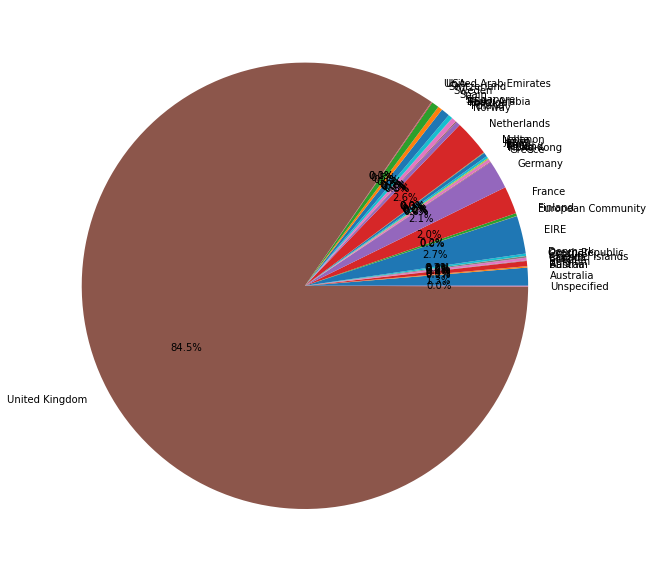

In [53]:
plt.figure(figsize=(10,12))
sales_country = df_month.groupby('Country').agg({'Amount':np.sum})
plt.pie(sales_country['Amount'], labels=sales_country.index, autopct='%1.1f%%')
plt.show()

United Kingdom has highest contribution towards sales.

### 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated

              Amount
InvoiceNo           
536365        139.12
536366         22.20
536367        278.73
536368         70.05
536369         17.85
...              ...
C581484    168469.60
C581490        32.53
C581499       224.69
C581568        54.75
C581569         7.50

[25897 rows x 1 columns]


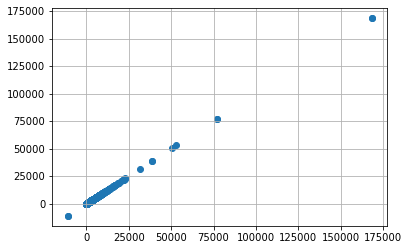

In [65]:
df.groupby('InvoiceNo').agg({'Amount':np.sum})
print (sales_invoice)
plt.scatter(sales_invoice.values,sales_invoice.values)
plt.grid(True)
plt.show()

Most of the invoice amount is concentrated in 25000 range.

### Enhancements for code
You can try these enhancements in code
1. Change the bar chart to show the value of bar

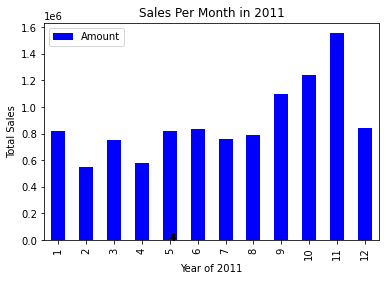

In [94]:
df3 = df_month.groupby('Month').agg({'Amount':np.sum})
df_month.groupby('Month').agg({'Amount':np.sum}).plot(kind='bar', color='blue', label = df3.index)
#plt.bar(df3.index, df3.values)
for index, values in enumerate(df3.values):
    plt.text(value, index, str(value))
plt.xlabel('Year of 2011')
plt.ylabel('Total Sales')
plt.title('Sales Per Month in 2011')
plt.show()

### 2. In Pie Chart Play With Parameters shadow=True, startangle=90 and see how different the chart looks

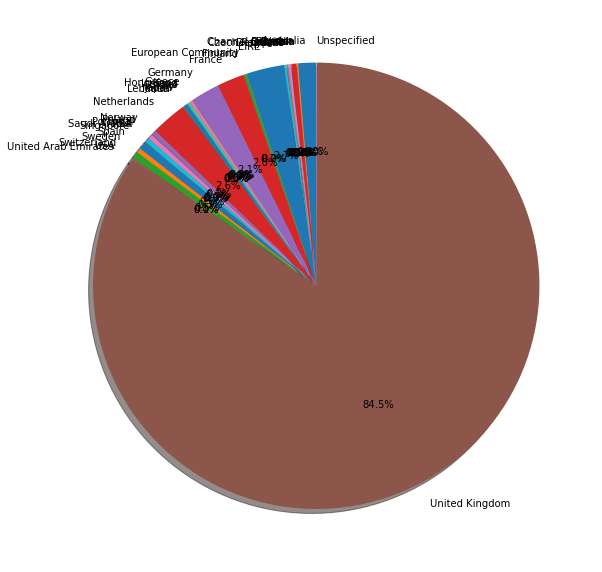

In [95]:
plt.figure(figsize=(10,12))
sales_country = df_month.groupby('Country').agg({'Amount':np.sum})
plt.pie(sales_country['Amount'], labels=sales_country.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

#### 3. In scatter plot change the color of Scatter Points

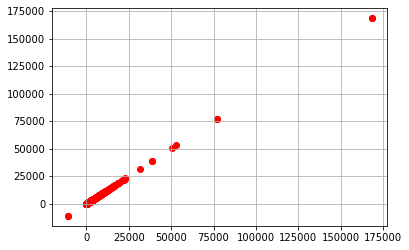

In [97]:
df.groupby('InvoiceNo').agg({'Amount':np.sum})
plt.scatter(sales_invoice.values,sales_invoice.values, color = 'red')
plt.grid(True)
plt.show()